# Classification Methods on Mushroom Dataset

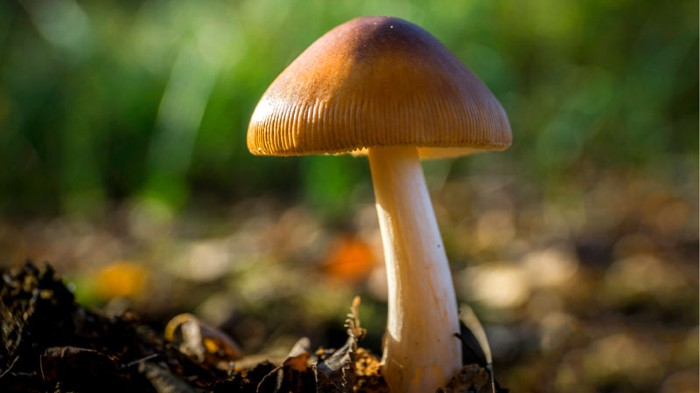

# Importing Libraries and Modules

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [5]:
df = pd.read_csv("mushroom.csv")

In [6]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and I will create a machine learning algorythm which is detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

# Examine Data

I import the data and now I will use .head and .info methods to learn more about dataset

In [7]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


The .head() method will give you the first 5 rows of the dataset. Here is the output:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

There are NO Null Values in a dataset.

In [9]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [10]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

The .describe() method will give you the statistics of the columns.
count:  shows the number of responses.
unique: shows the number of unique categorical values.
top:    shows the highest-occurring categorical value.
freq:   shows the frequency/count of the highest-occurring categorical value.

In [11]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


This shows that our dataset contains 8124 rows i.e. instances of mushrooms and 23 columns i.e. the specifications like cap-shape, cap-surface, cap-color, bruises, odor, gill-size, etc.

# Unique occurrences of ‘class’ column

In [12]:
df["class"].unique()

array(['p', 'e'], dtype=object)

The .unique() method will give you the unique occurrences in the ‘class’ column of the dataset. Here is the output:

As we can see, there are two unique values in the ‘class’ column of the dataset namely:
‘p’ -> poisonous and ‘e’ -> edible

In [13]:
df["class"]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [14]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The .value_counts() method will give you the count of the unique occurrences.

We have a class column which is giving the mushrooms poisinous(p) or edible(e). As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

# Now let’s visualize the count of edible and poisonous mushrooms using Seaborn

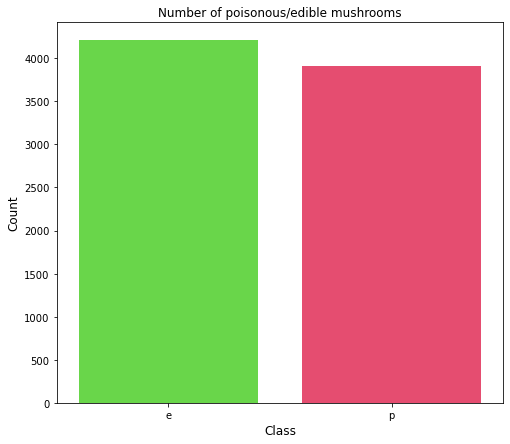

In [15]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

From the bar plot, we see that the dataset is balanced.

# Data Manipulation


The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [16]:
df = df.astype('category')
df.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises%3F                  category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
class                       category
dtype: object

As we can see, our columns are now of type ‘category’. We can now use LabelEncoder to convert categorical values to ordinal.

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['class'] = label_encoder.fit_transform(df['class'])

df['class'].unique()


array([1, 0])

In [20]:
df['habitat'] = label_encoder.fit_transform(df['habitat'])

df['habitat'].unique()

array([5, 1, 3, 0, 4, 6, 2])

Now we see that all the column values are converted to ordinal and there are no categorical values left!
Also, the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [38]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,s,w,w,w,o,p,k,s,5,1
1,5,2,9,1,0,1,0,0,4,0,...,s,w,w,w,o,p,n,n,1,0
2,0,2,8,1,3,1,0,0,5,0,...,s,w,w,w,o,p,n,n,3,0
3,5,3,8,1,6,1,0,1,5,0,...,s,w,w,w,o,p,k,s,5,1
4,5,2,3,0,5,1,1,0,4,1,...,s,w,w,w,o,e,n,a,1,0


In [39]:
for columns in df.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(df[columns].unique())-1)
    for i in df[columns].unique():
        df[columns] = [value if letter == i else letter for letter in df[columns]]
        value += step

In [40]:
df_check = df.head()
df_check = df_check.append(df.tail())
df_check

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0.2,0.666667,0.666667,1.0,0.125,1.0,0.0,1.0,0.727273,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.500000,1
1,0.2,0.666667,0.111111,1.0,0.125,1.0,0.0,1.0,0.727273,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667,0
2,0.2,0.666667,0.222222,1.0,0.250,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333,0
3,0.2,0.333333,0.222222,1.0,0.125,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.500000,1
4,0.2,0.666667,0.333333,1.0,0.375,1.0,1.0,1.0,0.727273,1.0,...,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667,0
8119,0.8,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8120,0.2,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000,0
8121,0.6,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8122,0.8,0.333333,0.666667,1.0,0.750,1.0,0.0,1.0,0.727273,1.0,...,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000,1
8123,0.2,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,0.750,1.0,1.000000,0


In [21]:
df['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: category
Categories (1, object): [p]

In [22]:
df = df.drop(["veil-type"],axis=1)

In [41]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0.2,0.666667,0.666667,1.0,0.125,1.0,0.0,1.0,0.727273,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.500000,1
1,0.2,0.666667,0.111111,1.0,0.125,1.0,0.0,1.0,0.727273,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667,0
2,0.2,0.666667,0.222222,1.0,0.250,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333,0
3,0.2,0.333333,0.222222,1.0,0.125,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.500000,1
4,0.2,0.666667,0.333333,1.0,0.375,1.0,1.0,1.0,0.727273,1.0,...,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.8,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8120,0.2,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000,0
8121,0.6,0.666667,0.666667,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8122,0.8,0.333333,0.666667,1.0,0.750,1.0,0.0,1.0,0.727273,1.0,...,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000,1


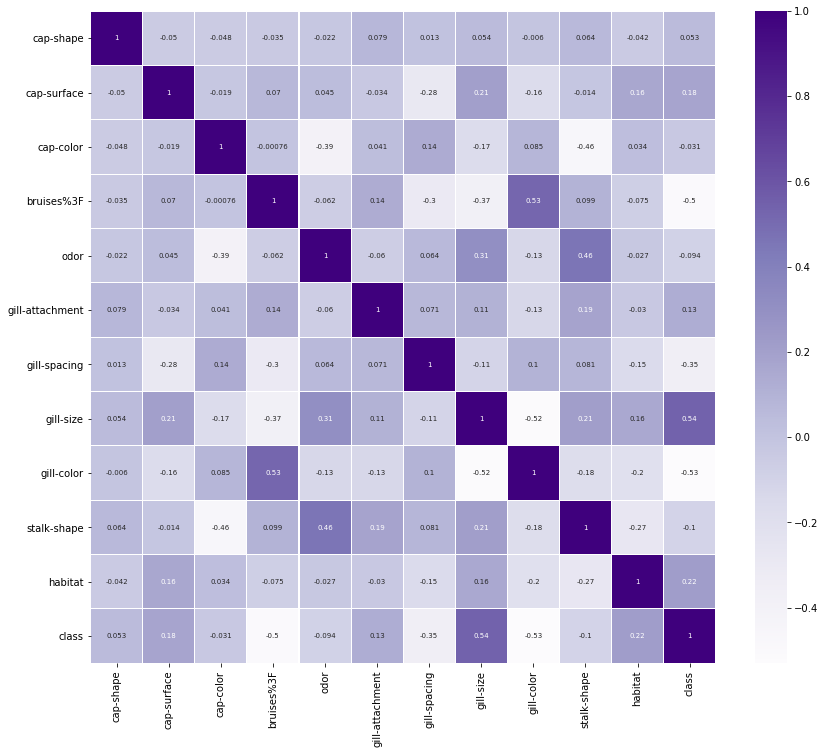

In [24]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

Usually, the least correlating variable is the most important one for classification. In this case, “gill-color” is -0.53 so let’s look at it closely:

In [25]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


# Let’s look closely at the feature “gill-color”:

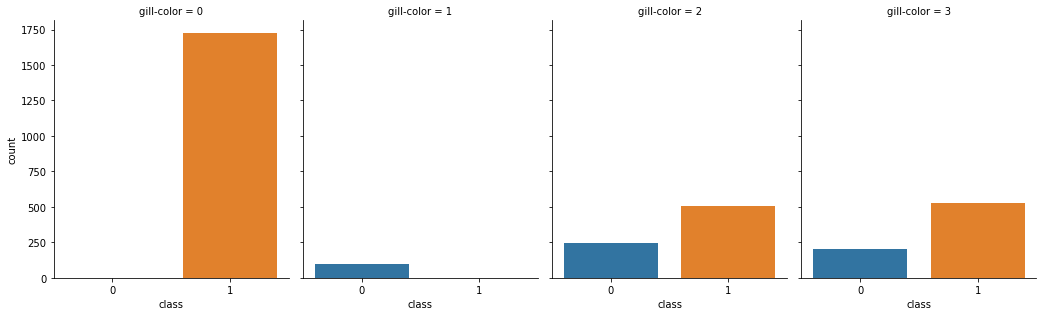

In [26]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

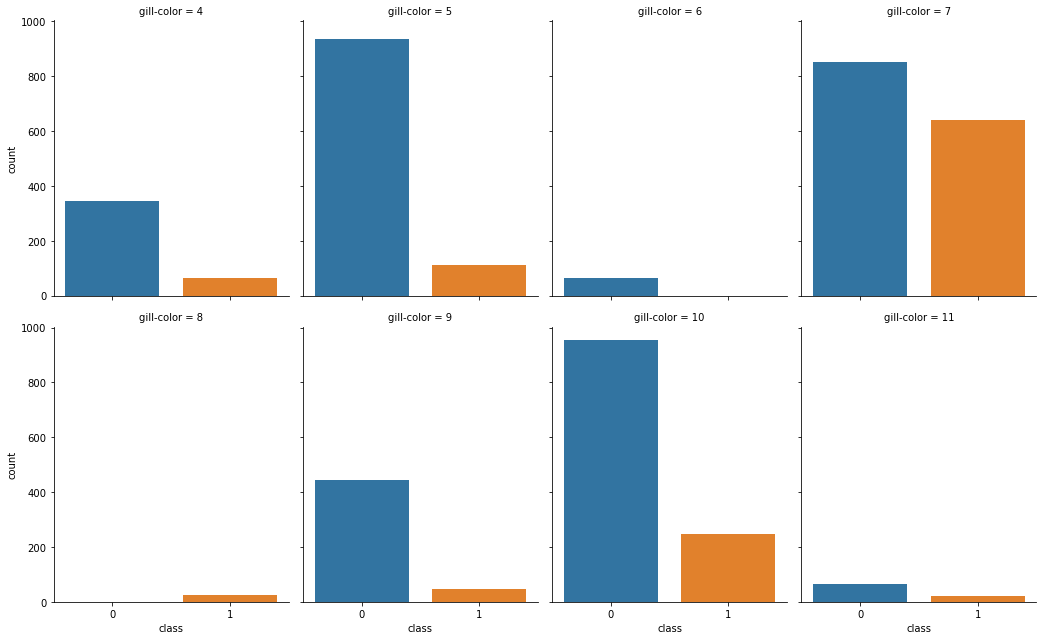

In [27]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

# Preparing the Data

Setting X and y-axis and splitting the data into train and test respectively.
Since we want to predict the class of the mushroom, we will drop the ‘class’ column.

# Since the 'class' has only two Variable we use binary classification matrix

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting the dataframe

In [29]:
X = df.drop(['class'], axis=1)

In [30]:
y=df["class"]
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

# Preparing Data for Machine Learning

In [49]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [50]:
from sklearn.model_selection import train_test_split
y = df["class"].values    # "class" column as numpy array.
x = df.drop(["class"], axis=1).values    # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)    # Split data for train and test.

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 92.68%


In [56]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

print(lr_conf_matrix)
print(lr_accuracy)

[[803  40]
 [ 79 703]]
0.9267692307692308


In [58]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

In [59]:
print(gnb_predict)
print(gnb_predict_prob)

[0. 1. 1. ... 1. 1. 1.]
[[9.99999999e-01 1.22735241e-09]
 [2.76219492e-08 9.99999972e-01]
 [3.07044238e-06 9.99996930e-01]
 ...
 [2.88117391e-09 9.99999997e-01]
 [2.04630873e-11 1.00000000e+00]
 [4.55844891e-10 1.00000000e+00]]


In [60]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[830  13]
 [141 641]]
0.9052307692307693


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_accuracy_score)

[[843   0]
 [  0 782]]
1.0


In [63]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_accuracy_score)
#random forest has a higher accuracy score than the decision tree
#Decision tree = 99.3
#Random forest = 99.9

[[843   0]
 [  0 782]]
1.0


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob[:,1])
rf_auc = auc(fpr, tpr)
print(rf_auc)

1.0


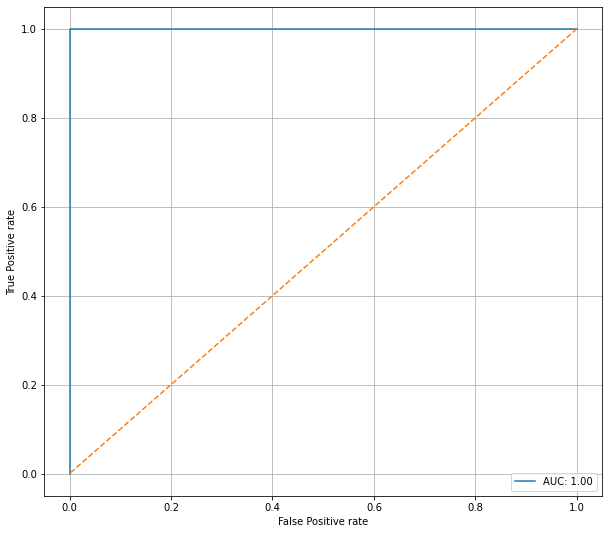

In [65]:
#plot the ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid()


# Feature importance and conclusions

My classification models all performed really well with the dataset! Which was definitely surprising to me…. but I’ll touch more on that later.
A few thoughts on my models — Logistic Regression, which had a score of 99% would normally be an excellent choice. However, given that the model predicted a few false negatives (and that could be deadly in this case), I would say that the other 3 models performed perfectly and as such, are much better suited to classify mushrooms.

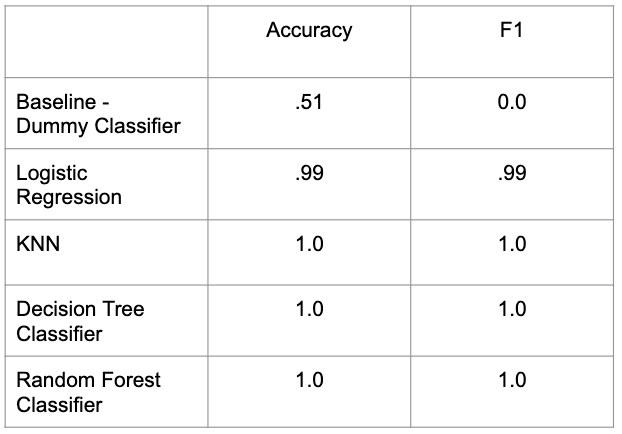